In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
"""Reading the simulations"""

import matplotlib.pyplot as plt 
import numpy as np
import pynbody


s=pynbody.load('/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/0016/WMAP3.CLUES.HR.000016')
h = s.halos()

In [7]:
#Graficos de Densidad de las Estrellas
'''CON EL SPHVIEWER!!!'''

import matplotlib.pyplot as plt
import rotation as rot
import sphviewer as sph
import numpy as np

vector = (1,2,3)
r200 = (189.977454324, 173.656484976, 137.617865798)
    
for i in range(0,3):
    
    h1 = h[vector[i]]
    
    cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True).in_units('kpc')
    
    rgal =0.15*r200[i]
    
    print 'rgal=', rgal, 'r200=', r200[i]
    
    #h1['pos'] -= cen_pot
    
    xstr=(h1.star['pos'].in_units('kpc'))[:,0] - (cen_pot.in_units('kpc'))[0]
    ystr=(h1.star['pos'].in_units('kpc'))[:,1] - (cen_pot.in_units('kpc'))[1]
    zstr=(h1.star['pos'].in_units('kpc'))[:,2] - (cen_pot.in_units('kpc'))[2]
    r = np.sqrt(xstr**2+ystr**2+zstr**2)    
        
#---------------masas------------------------------------------        
    m_str = h1.star['mass'].in_units('Msol')
        
        
    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])
                
    Mc = np.cumsum((m_str[limit])[r_indice])
    Mgal = Mc[-1]
               
    razon = Mc/Mgal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)
        
    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
    
    print 'r50=', r50[-1], 'r90=', r90[-1]
#------------------------------------------------------------------        
##esto sirve si quiero hacer una submuestra de mi conjunto de datos
       
    veloc,=np.where(r<r50[-1])
        
#----------componentes de la velocidad del centro de masa------------
    vel=(h1.star['vel'].in_units('km s**-1'))

    vxcm = sum(m_str[veloc]*vel[veloc,0])/sum(m_str[veloc])
    vycm = sum(m_str[veloc]*vel[veloc,1])/sum(m_str[veloc])
    vzcm = sum(m_str[veloc]*vel[veloc,2])/sum(m_str[veloc])
        
#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm
        
# utilizo una matriz de rotacion de modo que el plano xy coincida aprox con el plano del disco
# rot.rot, el primer rot es como yo le llamo arriba cuando importo, el segundo rot tiene que ver
#con como se llama la funcion adentro del archivo rotation
    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(m_str,xstr,ystr,zstr,vx,vy,vz,r90[-1])

##posiciones de partículas que se quiere graficar
##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    pos=np.ndarray([3,np.size(xn)])
    pos[0,:]=xn
    pos[1,:]=yn
    pos[2,:]=zn

#---------------------generador del gráfico-----------------
    rl=15    
    corte,=np.where((xn<rl) & (yn<rl) & (zn<rl) & (xn>-rl) & (yn>-rl) & (zn>-rl))
         
#-----rango que tiene la escala  de colores-----
    vmin=0
    vmax=9
        
# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='magma'
    
#-----grafico-----------
    fig=plt.figure(i,figsize=(16,8))
    fig.subplots_adjust(bottom=0.08, left =0.09, right = 0.95, top = 0.95, wspace=0.3, hspace= 0.05)
        
    particles=sph.Particles(pos[:,corte],m_str[corte],nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()
        
    ax1=fig.add_subplot(121)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap)
    #plt.axis('off')
    ax1.set_title('halo_'+ str('%s'%vector[i]), fontsize=22)
    plt.xlabel('$x$'+' $[kpc]$', fontsize=24)
    plt.ylabel('$y$'+' $[kpc]$', fontsize=24)
    ax1.minorticks_on()
    ax1.tick_params( labelsize=20)
    ax1.tick_params('both', length=5, width=1.8,which='minor')
    ax1.tick_params('both', length=8, width=1.8,which='major')
    #plt.text(-13, 13, str('%.3f'%t)+'Gyr', fontsize=22, color='white', ha='left', va='top') 
        
        
    particles=sph.Particles(pos[:,corte],m_str[corte],nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()
        
    ax2=fig.add_subplot(122)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap)
    #plt.axis('off')
    plt.xlabel('$x$'+' $[kpc]$', fontsize=24)
    plt.ylabel('$z$'+' $[kpc]$', fontsize=24)
    ax2.minorticks_on()
    ax2.tick_params( labelsize=20)
    ax2.tick_params('both', length=5, width=1.8,which='minor')
    ax2.tick_params('both', length=8, width=1.8,which='major')
    #plt.text(12.5, 12.5, str('%.3f'%t)+'Gyr', fontsize=22, color='white', ha='left', va='top') 
        

    #fig.savefig('/home/ornela/python/sem1/M31_3/'+str('%03d'%isnap)+'-sh0'+str('%s'%vector[i])+'.png', facecolor= 'k', edgecolor='k', frameon= 'False',bbox_inches='tight',pad_inches=0, dpi = 100)
    #fig.savefig('/home/ornela/python/sem1/star2_'+str('%s'%vector[i])+'.png', dpi = 100)
    plt.show()
    #plt.clf()

rgal= 28.4966181486 r200= 189.977454324


/z/omarioni/miniconda2/lib/python2.7/site-packages/pynbody/array.py:864: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


IndexError: index -1 is out of bounds for axis 0 with size 0

rgal= 28.4966181486 r200= 189.977454324
r50= 0.881759274795 r90= 7.91317689287


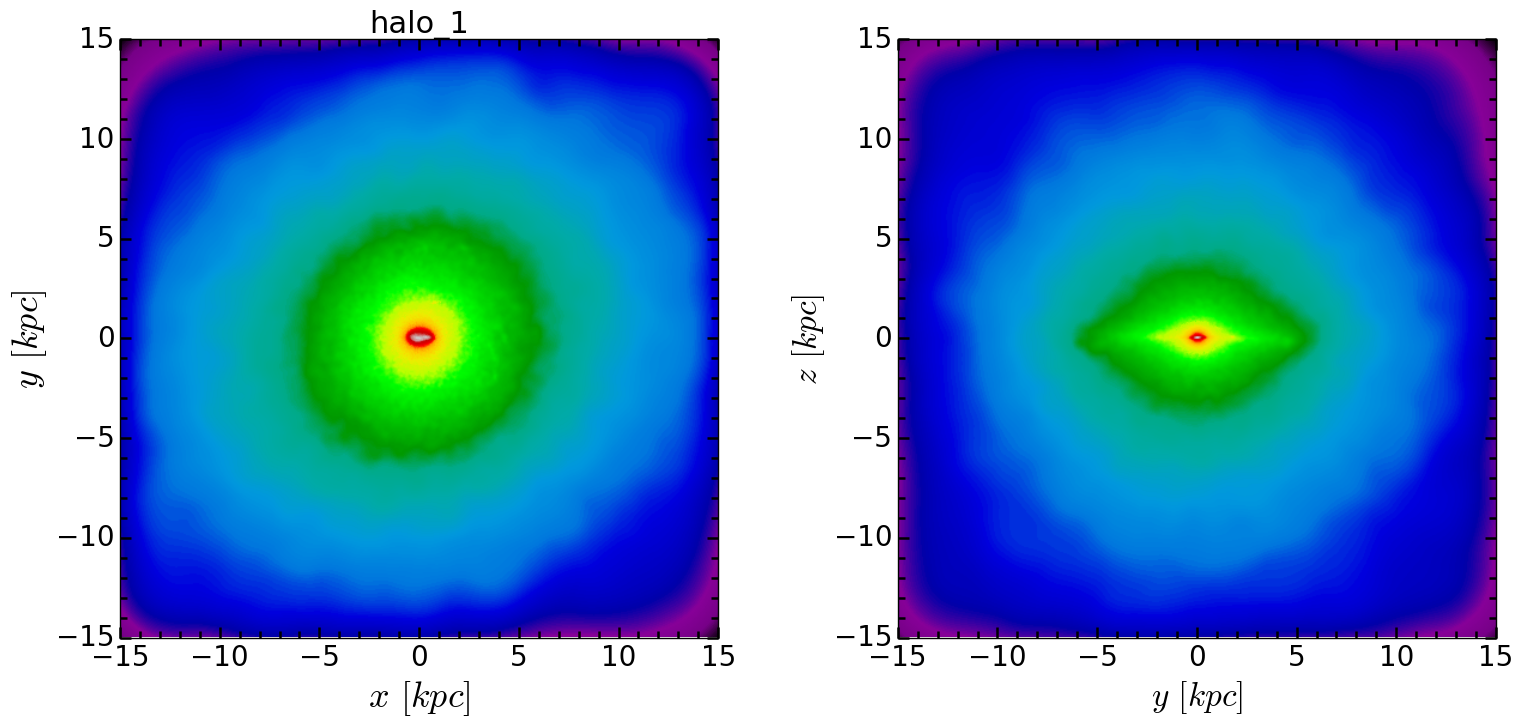

rgal= 26.0484727464 r200= 173.656484976
r50= 2.3052000317 r90= 11.7806248266


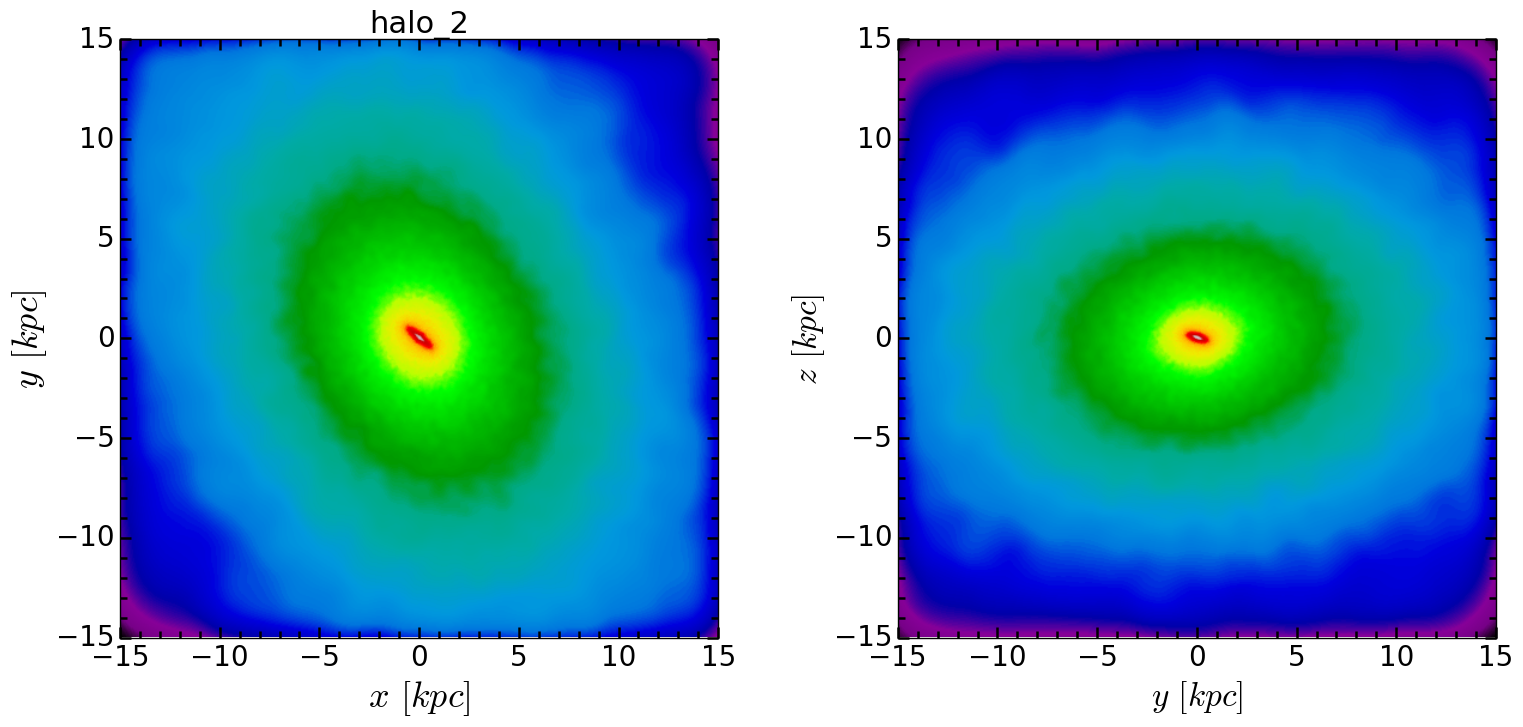

rgal= 20.6426798697 r200= 137.617865798


In [ ]:
#Graficos de Densidad de las Estrellas
'''CON EL SPHVIEWER!!!'''

import matplotlib.pyplot as plt
import rotation as rot
import sphviewer as sph
import numpy as np

vector = (1,2,4)
r200 = (189.977454324, 173.656484976, 137.617865798)
    
for i in range(0,3):
    
    h1 = h[vector[i]]
    
    cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True)
    
    rgal =0.15*r200[i]
    
    print 'rgal=', rgal, 'r200=', r200[i]
    
    #h1['pos'] -= cen_pot
    
    xstr=(h1.star['pos'].in_units('kpc'))[:,0] - (cen_pot.in_units('kpc'))[0]
    ystr=(h1.star['pos'].in_units('kpc'))[:,1] - (cen_pot.in_units('kpc'))[1]
    zstr=(h1.star['pos'].in_units('kpc'))[:,2] - (cen_pot.in_units('kpc'))[2]
    r = np.sqrt(xstr**2+ystr**2+zstr**2)    
        
#---------------masas------------------------------------------        
    m_str = h1.star['mass'].in_units('Msol')
        
        
    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])
                
    Mc = np.cumsum((m_str[limit])[r_indice])
    Mgal = Mc[-1]
               
    razon = Mc/Mgal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)
        
    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
    
    print 'r50=', r50[-1], 'r90=', r90[-1]
#------------------------------------------------------------------        
##esto sirve si quiero hacer una submuestra de mi conjunto de datos
       
    veloc,=np.where(r<r50[-1])
        
#----------componentes de la velocidad del centro de masa------------
    vel=(h1.star['vel'].in_units('km s**-1'))

    vxcm = sum(m_str[veloc]*vel[veloc,0])/sum(m_str[veloc])
    vycm = sum(m_str[veloc]*vel[veloc,1])/sum(m_str[veloc])
    vzcm = sum(m_str[veloc]*vel[veloc,2])/sum(m_str[veloc])
        
#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm
        
# utilizo una matriz de rotacion de modo que el plano xy coincida aprox con el plano del disco
# rot.rot, el primer rot es como yo le llamo arriba cuando importo, el segundo rot tiene que ver
#con como se llama la funcion adentro del archivo rotation
    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(m_str,xstr,ystr,zstr,vx,vy,vz,r90[-1])

##posiciones de partículas que se quiere graficar
##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    pos=np.ndarray([3,np.size(xn)])
    pos[0,:]=xn
    pos[1,:]=yn
    pos[2,:]=zn

#---------------------generador del gráfico-----------------
    rl=15    
    corte,=np.where((xn<rl) & (yn<rl) & (zn<rl) & (xn>-rl) & (yn>-rl) & (zn>-rl))
         
#-----rango que tiene la escala  de colores-----
    vmin=0
    vmax=9
        
# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='nipy_spectral'
    
#-----grafico-----------
    fig=plt.figure(i,figsize=(16,8))
    fig.subplots_adjust(bottom=0.08, left =0.09, right = 0.95, top = 0.95, wspace=0.3, hspace= 0.05)
        
    particles=sph.Particles(pos[:,corte],m_str[corte],nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()
        
    ax1=fig.add_subplot(121)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap)
    #plt.axis('off')
    ax1.set_title('halo_'+ str('%s'%vector[i]), fontsize=22)
    plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
    plt.ylabel('$y$'+' $[kpc]$', fontsize=26)
    ax1.minorticks_on()
    ax1.tick_params( labelsize=20)
    ax1.tick_params('both', length=5, width=1.8,which='minor')
    ax1.tick_params('both', length=8, width=1.8,which='major')
    #plt.text(-13, 13, str('%.3f'%t)+'Gyr', fontsize=22, color='white', ha='left', va='top') 
        
        
    particles=sph.Particles(pos[:,corte],m_str[corte],nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, p=90)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()
        
    ax2=fig.add_subplot(122)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap)
    #plt.axis('off')
    plt.xlabel('$y$'+' $[kpc]$', fontsize=24)
    plt.ylabel('$z$'+' $[kpc]$', fontsize=24)
    ax2.minorticks_on()
    ax2.tick_params( labelsize=20)
    ax2.tick_params('both', length=5, width=1.8,which='minor')
    ax2.tick_params('both', length=8, width=1.8,which='major')
    #plt.text(12.5, 12.5, str('%.3f'%t)+'Gyr', fontsize=22, color='white', ha='left', va='top') 
        

    #fig.savefig('/home/ornela/python/sem1/M31_3/'+str('%03d'%isnap)+'-sh0'+str('%s'%vector[i])+'.png', facecolor= 'k', edgecolor='k', frameon= 'False',bbox_inches='tight',pad_inches=0, dpi = 100)
    #fig.savefig('/home/ornela/python/sem1/star2_'+str('%s'%vector[i])+'.png', dpi = 100)
    plt.show()
    #plt.clf()

SimArray([[  4701.23632812,   4673.21484375,   4645.19335938, ...,
         11708.23242188,  12079.23632812,  12450.24023438],
       [  4799.86474609,   4772.78369141,   4745.70410156, ...,
         11459.00878906,  11835.6875    ,  12212.36328125],
       [  4898.49414062,   4872.35498047,   4846.21630859, ...,
         11209.78710938,  11592.13769531,  11974.48828125],
       ..., 
       [  4648.20751953,   4641.37353516,   4634.54052734, ...,
          3221.63134766,   3234.75366211,   3247.87646484],
       [  4465.85253906,   4460.32226562,   4454.79150391, ...,
          3229.28027344,   3244.8293457 ,   3260.37866211],
       [  4283.49902344,   4279.27099609,   4275.04296875, ...,
          3236.92895508,   3254.90454102,   3272.88037109]], dtype=float32, 'Msol kpc**-3')

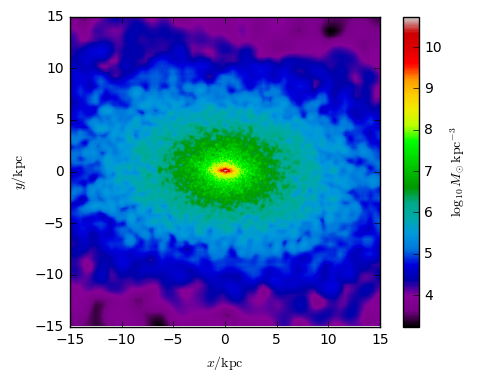

In [6]:

h1 = h[2]

cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True)

h1['pos'] -= cen_pot

s.physical_units()

pynbody.analysis.angmom.sideon(h1, cen=(0,0,0))

pynbody.plot.image(h1.s, width=30, cmap='nipy_spectral')



In [7]:
print h

In [3]:
"""Reading the simulations"""

import matplotlib.pyplot as plt 
import numpy as np
import pynbody


s=pynbody.load('/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/0864/WMAP3.CLUES.HR.000864')
h = s.halos()

rgal= 28.4966181486 r200= 189.977454324
r50= 0.83960975356 r90= 8.74985907443


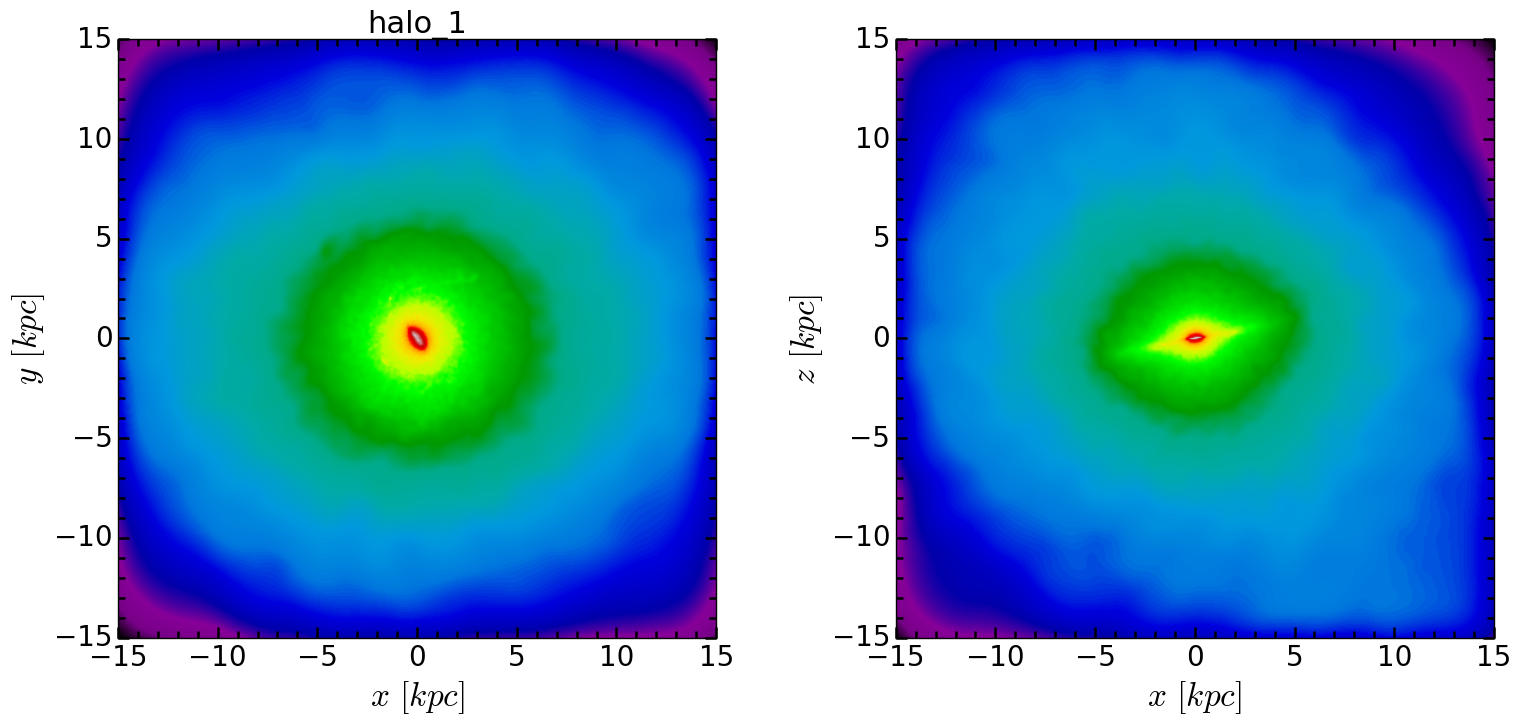

rgal= 26.0484727464 r200= 173.656484976
r50= 2.29369783816 r90= 11.858282411


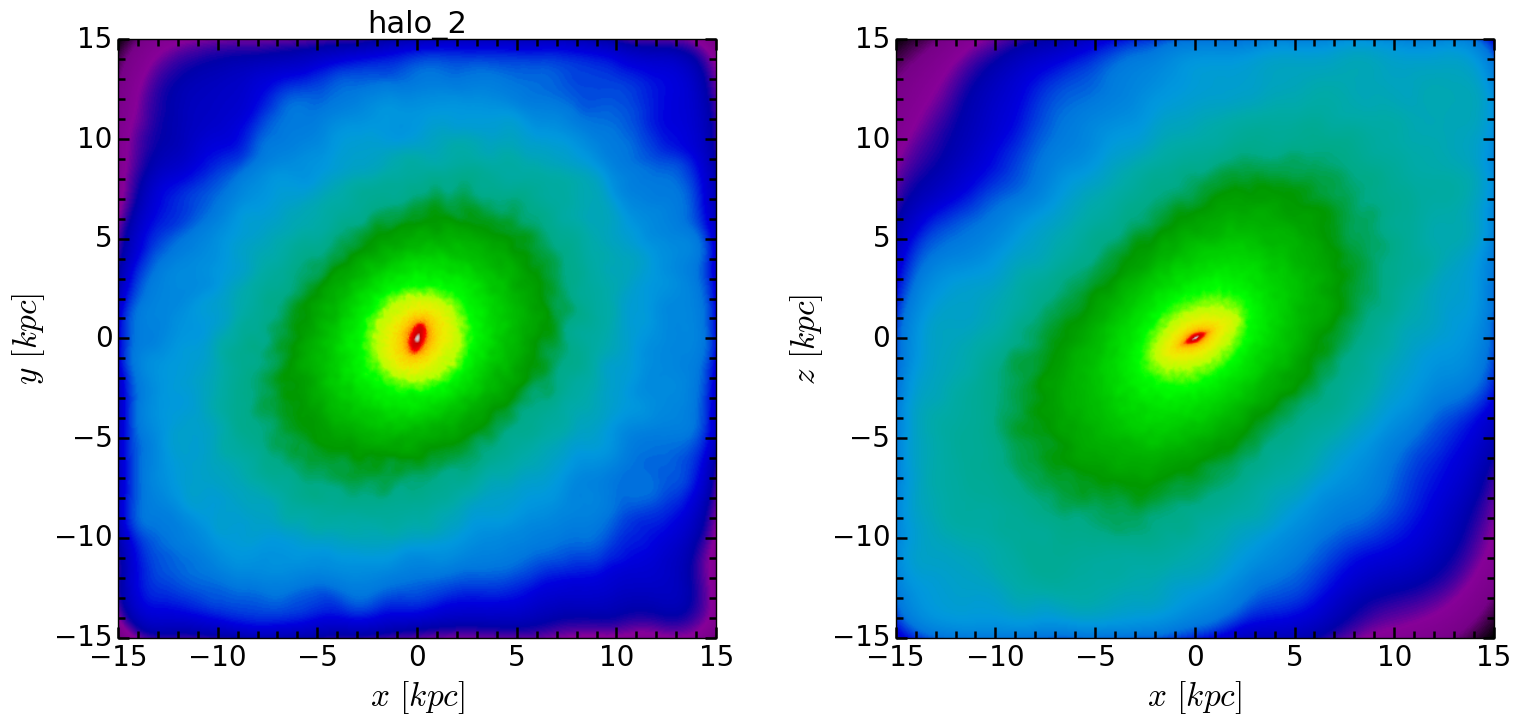

rgal= 20.6426798697 r200= 137.617865798


IndexError: index -1 is out of bounds for axis 0 with size 0

In [4]:
#Graficos de Densidad de las Estrellas
'''CON EL SPHVIEWER!!!'''

import matplotlib.pyplot as plt
import rotation as rot
import sphviewer as sph
import numpy as np

vector = (1,2,4)
r200 = (189.977454324, 173.656484976, 137.617865798)
    
for i in range(0,3):
    
    h1 = h[vector[i]]
    
    cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True).in_units('kpc')
    
    rgal =0.15*r200[i]
    
    print 'rgal=', rgal, 'r200=', r200[i]
    
    #h1['pos'] -= cen_pot
    
    xstr=(h1.star['pos'].in_units('kpc'))[:,0] - (cen_pot.in_units('kpc'))[0]
    ystr=(h1.star['pos'].in_units('kpc'))[:,1] - (cen_pot.in_units('kpc'))[1]
    zstr=(h1.star['pos'].in_units('kpc'))[:,2] - (cen_pot.in_units('kpc'))[2]
    r = np.sqrt(xstr**2+ystr**2+zstr**2)    
        
#---------------masas------------------------------------------        
    m_str = h1.star['mass'].in_units('Msol')
        
        
    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])
                
    Mc = np.cumsum((m_str[limit])[r_indice])
    Mgal = Mc[-1]
               
    razon = Mc/Mgal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)
        
    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
    
    print 'r50=', r50[-1], 'r90=', r90[-1]
#------------------------------------------------------------------        
##esto sirve si quiero hacer una submuestra de mi conjunto de datos
       
    veloc,=np.where(r<r50[-1])
        
#----------componentes de la velocidad del centro de masa------------
    vel=(h1.star['vel'].in_units('km s**-1'))

    vxcm = sum(m_str[veloc]*vel[veloc,0])/sum(m_str[veloc])
    vycm = sum(m_str[veloc]*vel[veloc,1])/sum(m_str[veloc])
    vzcm = sum(m_str[veloc]*vel[veloc,2])/sum(m_str[veloc])
        
#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = vel[:,0] - vxcm
    vy = vel[:,1] - vycm
    vz = vel[:,2] - vzcm
        
# utilizo una matriz de rotacion de modo que el plano xy coincida aprox con el plano del disco
# rot.rot, el primer rot es como yo le llamo arriba cuando importo, el segundo rot tiene que ver
#con como se llama la funcion adentro del archivo rotation
    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(m_str,xstr,ystr,zstr,vx,vy,vz,r90[-1])

##posiciones de partículas que se quiere graficar
##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    pos=np.ndarray([3,np.size(xn)])
    pos[0,:]=xn
    pos[1,:]=yn
    pos[2,:]=zn

#---------------------generador del gráfico-----------------
    rl=15    
    corte,=np.where((xn<rl) & (yn<rl) & (zn<rl) & (xn>-rl) & (yn>-rl) & (zn>-rl))
         
#-----rango que tiene la escala  de colores-----
    vmin=0
    vmax=9
        
# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='nipy_spectral'
    
#-----grafico-----------
    fig=plt.figure(i,figsize=(16,8))
    fig.subplots_adjust(bottom=0.08, left =0.09, right = 0.95, top = 0.95, wspace=0.3, hspace= 0.05)
        
    particles=sph.Particles(pos[:,corte],m_str[corte],nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()
        
    ax1=fig.add_subplot(121)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap)
    #plt.axis('off')
    ax1.set_title('halo_'+ str('%s'%vector[i]), fontsize=22)
    plt.xlabel('$x$'+' $[kpc]$', fontsize=24)
    plt.ylabel('$y$'+' $[kpc]$', fontsize=24)
    ax1.minorticks_on()
    ax1.tick_params( labelsize=20)
    ax1.tick_params('both', length=5, width=1.8,which='minor')
    ax1.tick_params('both', length=8, width=1.8,which='major')
    #plt.text(-13, 13, str('%.3f'%t)+'Gyr', fontsize=22, color='white', ha='left', va='top') 
        
        
    particles=sph.Particles(pos[:,corte],m_str[corte],nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()
        
    ax2=fig.add_subplot(122)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap)
    #plt.axis('off')
    plt.xlabel('$x$'+' $[kpc]$', fontsize=24)
    plt.ylabel('$z$'+' $[kpc]$', fontsize=24)
    ax2.minorticks_on()
    ax2.tick_params( labelsize=20)
    ax2.tick_params('both', length=5, width=1.8,which='minor')
    ax2.tick_params('both', length=8, width=1.8,which='major')
    #plt.text(12.5, 12.5, str('%.3f'%t)+'Gyr', fontsize=22, color='white', ha='left', va='top') 
        

    #fig.savefig('/home/ornela/python/sem1/M31_3/'+str('%03d'%isnap)+'-sh0'+str('%s'%vector[i])+'.png', facecolor= 'k', edgecolor='k', frameon= 'False',bbox_inches='tight',pad_inches=0, dpi = 100)
    #fig.savefig('/home/ornela/python/sem1/star2_'+str('%s'%vector[i])+'.png', dpi = 100)
    plt.show()
    #plt.clf()